In [1]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from DBSCAN import dbscan
from Visualization import visualization, interactive_visualization

In [2]:
df = pd.read_csv('haberman-clustering.csv')

In [3]:
#Scaling the data to bring all the attributes to a comparable level
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

#Normalizing the data so that the data approximately follows a Gaussian distribution
df_normalized = normalize(df_scaled)

In [4]:
#Converting the numpy array into a pandas DataFrame
df_normalized = pd.DataFrame(df_normalized)
#Renaming the columns
df_normalized.columns = df.columns
df_normalized

,Age,Op_year,axil_nodes
0,-0.987066,-0.135932,-0.084991
1,-0.923446,0.281903,-0.260341
2,-0.846824,-0.514674,-0.134166
3,-0.952356,0.304282,-0.020764
4,-0.727400,-0.611527,0.311326
...,...,...,...
277,0.968856,-0.132837,-0.208979
278,0.845136,0.483892,-0.227142
279,0.960414,0.268117,-0.075625
280,0.949931,0.254811,-0.180838


In [5]:
data_array = df_normalized.values
data_list = data_array.tolist()
X = data_list
x = data_array

In [6]:
len(df)

282

In [7]:
eps = 0.31
min_pts = 3
cluster_labels = dbscan(X, eps, min_pts)
print(set(cluster_labels))

# Calculate metrics
ch_index = calinski_harabasz_score(data_list, cluster_labels)
silhouette_avg = silhouette_score(x, cluster_labels)
db_index = davies_bouldin_score(x, cluster_labels)

print("Silhouette Score:", silhouette_avg)
print("Calinski Harabasz Score:", ch_index)
print("Davies Bouldin Index:", db_index)

{1, 2, -1}
Silhouette Score: 0.10796398540915751
Calinski Harabasz Score: 23.59741060817998
Davies Bouldin Index: 3.2339132058360796


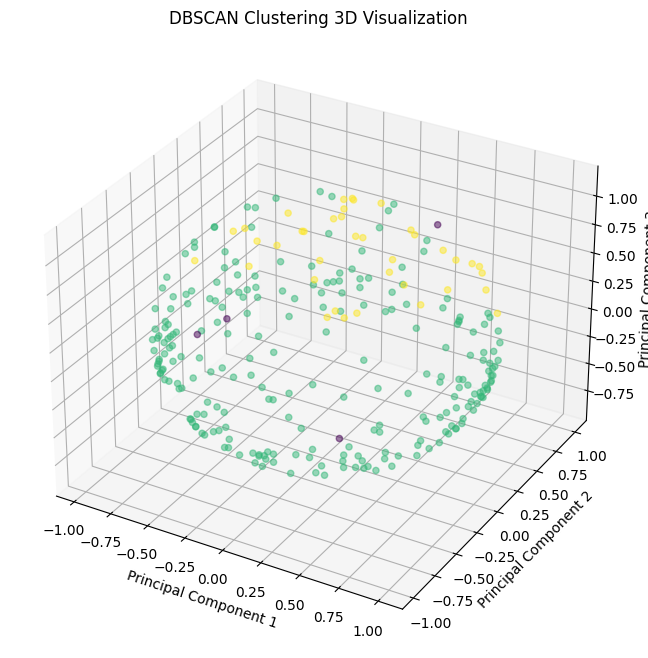

In [8]:
visualization(x, cluster_labels)

In [9]:
interactive_visualization(x, cluster_labels)

In [10]:
cluster_labels.count(-1)

4